In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import sys
import pickle
from graph_viz_utils import *

# Visualize distance graph

In [2]:
with open('./adj_mx_3d.pkl', 'rb') as pf:
    adj_mx_data = pickle.load(pf)

In [3]:
# Pre-computed adjacency matrix for distance graph
adj_mx = adj_mx_data[2]
adj_mx

array([[1.        , 0.24243228, 0.24135648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24237573, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08801569, 0.        , 0.        ],
       [0.24243228, 1.        , 0.        , 0.24135648, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24237573, 0.        , 0.        , 0.        ,
        0.        , 0.08801569, 0.        , 0.        ],
       [0.24135648, 0.        , 1.        , 0.        , 0.14517006,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.30257306, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27650845, 0.        , 0.        ],
       [0.        , 0.24135648, 0.        , 1.        , 0.        ,
        0.14517006, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30257306, 0.        , 0.        , 0.        ,
        0.   

In [4]:
# Remove "EEG" in the node name
node_id_dict = {}
for key, val in adj_mx_data[1].items():
    key = key.split(' ')[-1]
    node_id_dict[key] = val
node_id_dict

{'FP1': 0,
 'FP2': 1,
 'F3': 2,
 'F4': 3,
 'C3': 4,
 'C4': 5,
 'P3': 6,
 'P4': 7,
 'O1': 8,
 'O2': 9,
 'F7': 10,
 'F8': 11,
 'T3': 12,
 'T4': 13,
 'T5': 14,
 'T6': 15,
 'FZ': 16,
 'CZ': 17,
 'PZ': 18}

In [5]:
# Get positions of nodes
pos_spec = get_spectral_graph_positions()

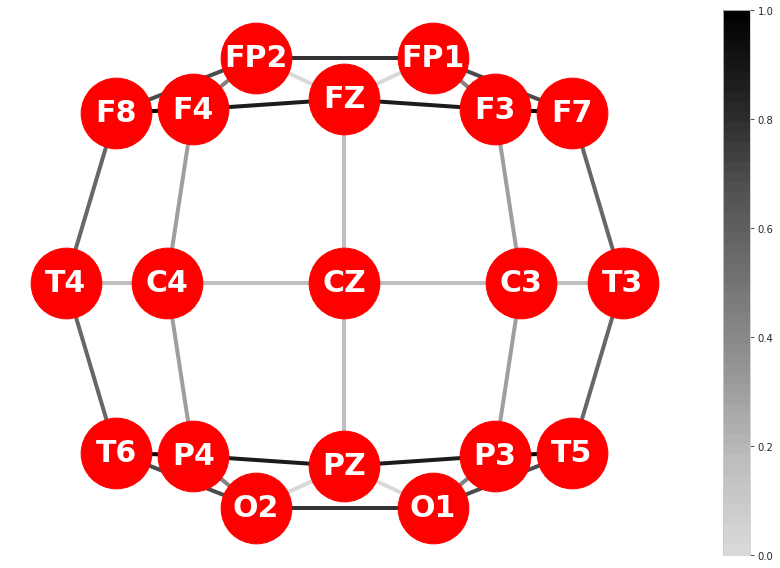

In [6]:
draw_graph_weighted_edge(adj_mx, node_id_dict, pos_spec, is_directed=False, plot_colorbar=True, font_size=30)

# Visualize correlation graphs

Similarly, you can use `draw_graph_weighted_edge` function to visualize correlation graphs by specifying the corresponding `adj_mx` and `is_directed = True`. To get adjacency matrices for correlation graphs, you can use the corresponding dataloader in `../data` folder.

## Compute graph area meteric

In [7]:
channels = [("FP1", "F7"),
            ("F7", "T3"),
            ("T3", "T5"),
            ("T5", "O1"),
            ("FP1", "F3"),
            ("F3", "C3"),
            ("C3", "P3"),
            ("P3", "O1"),

            ("FP2", "F8"),
            ("F8", "T4"),
            ("T4", "T6"),
            ("T6", "O2"),
            ("FP2", "F4"),
            ("F4", "C4"),
            ("C4", "P4"),
            ("P4", "O2"),

            ("Fz", "Cz"),
            ("Pz", "Cz"),
            ("C3", "Cz"),
            ("C4", "Cz"),
            ]

In [10]:
adj_mx_present = np.zeros_like(adj_mx)

present_channels = [0, 1,2,3,4, 19]
for bipolar_ch in present_channels:
    ch1, ch2 = channels[bipolar_ch]
    idx1 = node_id_dict[ch1.upper()]
    idx2 = node_id_dict[ch2.upper()]
    dist = adj_mx[idx1, idx2]
    adj_mx_present[idx1, idx2] = dist
    adj_mx_present[idx2, idx1] = dist

adj_mx_present


array([[0.        , 0.        , 0.24135648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24237573, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.24135648, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

In [11]:
# Create a graph from the adjacency matrix
G = nx.Graph(adj_mx_present)


# Remove nodes with degree zero
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(nodes_to_remove)

# Check if the graph is connected
nx.is_connected(G)


/home/alireza/anaconda3/envs/adaexam/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


False

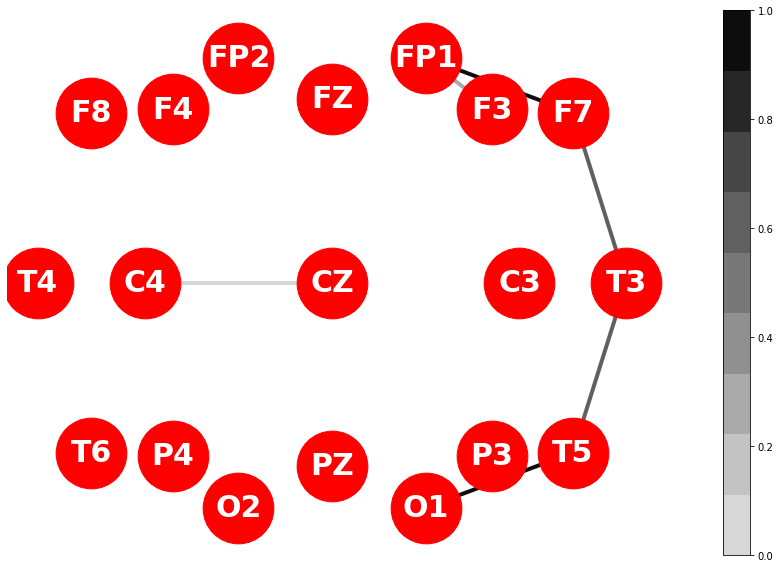

In [12]:
draw_graph_weighted_edge(adj_mx_present, node_id_dict, pos_spec, is_directed=False, plot_colorbar=True, font_size=30)


In [13]:
# Calculate weighted diameters for each connected component
connected_components = list(nx.connected_components(G))
weighted_diameters = []

for component in connected_components:
    subgraph = G.subgraph(component)

    avg_shortest_path_len = nx.average_shortest_path_length(subgraph, weight='weight')
    all_shortest_paths = nx.shortest_paths.all_pairs_dijkstra_path_length(subgraph, weight="weight")
    weighted_diameter = max(max(lengths.values()) for source, lengths in all_shortest_paths)
    weighted_diameters.append(weighted_diameter)

num_connected_components = len(connected_components)

print(f"Number of connected components: {num_connected_components}")
print(f"Weighted diameters of connected components: {weighted_diameters}")


Number of connected components: 2
Weighted diameters of connected components: [1.2108540385961533, 0.11379092186689377]


# Design cost
## Get the distance metrics

In [14]:
from tqdm import tqdm_notebook
import pandas as pd
import json

df = pd.read_json('./feasible_8edges.json')
df['present_channels'] = df.apply(lambda row: row.tolist(), axis=1)
df.head()

,0,1,2,3,4,5,6,7,present_channels
0,12,13,14,15,16,17,18,19,"[12, 13, 14, 15, 16, 17, 18, 19]"
1,11,13,14,15,16,17,18,19,"[11, 13, 14, 15, 16, 17, 18, 19]"
2,11,12,13,14,15,17,18,19,"[11, 12, 13, 14, 15, 17, 18, 19]"
3,11,12,13,14,15,16,18,19,"[11, 12, 13, 14, 15, 16, 18, 19]"
4,11,12,13,14,15,16,17,19,"[11, 12, 13, 14, 15, 16, 17, 19]"


In [15]:
def get_distance_metric(row_present_channels):
    row_adj_mx_present = np.zeros_like(adj_mx)
    for bi_ch in row_present_channels:
        ch1, ch2 = channels[bi_ch]
        idx1 = node_id_dict[ch1.upper()]
        idx2 = node_id_dict[ch2.upper()]
        dist = adj_mx[idx1, idx2]
        row_adj_mx_present[idx1, idx2] = dist
        row_adj_mx_present[idx2, idx1] = dist

        # Create a graph from the adjacency matrix
    row_g = nx.Graph(row_adj_mx_present)

    # Remove nodes with degree zero
    nodes_to_remove_row = [node for node, degree in dict(row_g.degree()).items() if degree == 0]
    row_g.remove_nodes_from(nodes_to_remove_row)

    # Check if the graph is connected
    # Calculate weighted diameters for each connected component
    row_connected_components = list(nx.connected_components(row_g))
    row_weighted_diameters = []
    row_avg_shortest_paths = []

    for row_component in row_connected_components:
        row_subgraph = row_g.subgraph(row_component)

        row_avg_shortest_path_len = nx.average_shortest_path_length(row_subgraph, weight='weight')
        row_avg_shortest_paths.append(row_avg_shortest_path_len)
        row_all_shortest_paths = nx.shortest_paths.all_pairs_dijkstra_path_length(row_subgraph, weight="weight")
        row_weighted_diameter= max(max(lengths.values()) for source, lengths in row_all_shortest_paths)
        row_weighted_diameters.append(row_weighted_diameter)

    num_connected_components = len(row_connected_components)

    return row_weighted_diameters, row_avg_shortest_paths, num_connected_components


In [16]:
df['distance_metric'] = df['present_channels'].apply(get_distance_metric)
df.head()

,0,1,2,3,4,5,6,7,present_channels,distance_metric
0,12,13,14,15,16,17,18,19,"[12, 13, 14, 15, 16, 17, 18, 19]","([0.7730530798435211], [0.35925738761822384], 1)"
1,11,13,14,15,16,17,18,19,"[11, 13, 14, 15, 16, 17, 18, 19]","([0.8564841151237488], [0.39164496461550397], 1)"
2,11,12,13,14,15,17,18,19,"[11, 12, 13, 14, 15, 17, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)"
3,11,12,13,14,15,16,18,19,"[11, 12, 13, 14, 15, 16, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)"
4,11,12,13,14,15,16,17,19,"[11, 12, 13, 14, 15, 16, 17, 19]","([1.0154288113117218], [0.4378661583695147], 1)"


In [17]:
df['diameter'] = df['distance_metric'].apply(lambda x: np.sum(x[0]))
df['avg_path'] = df['distance_metric'].apply(lambda x: np.sum(x[1]))
df['n_components'] = df['distance_metric'].apply(lambda x: x[2])
df.head()

,0,1,2,3,4,5,6,7,present_channels,distance_metric,diameter,avg_path,n_components
0,12,13,14,15,16,17,18,19,"[12, 13, 14, 15, 16, 17, 18, 19]","([0.7730530798435211], [0.35925738761822384], 1)",0.773053,0.359257,1
1,11,13,14,15,16,17,18,19,"[11, 13, 14, 15, 16, 17, 18, 19]","([0.8564841151237488], [0.39164496461550397], 1)",0.856484,0.391645,1
2,11,12,13,14,15,17,18,19,"[11, 12, 13, 14, 15, 17, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)",1.015429,0.437866,1
3,11,12,13,14,15,16,18,19,"[11, 12, 13, 14, 15, 16, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)",1.015429,0.437866,1
4,11,12,13,14,15,16,17,19,"[11, 12, 13, 14, 15, 16, 17, 19]","([1.0154288113117218], [0.4378661583695147], 1)",1.015429,0.437866,1


In [18]:
ch_min_cost = df.loc[df['diameter'].idxmin()]['present_channels']

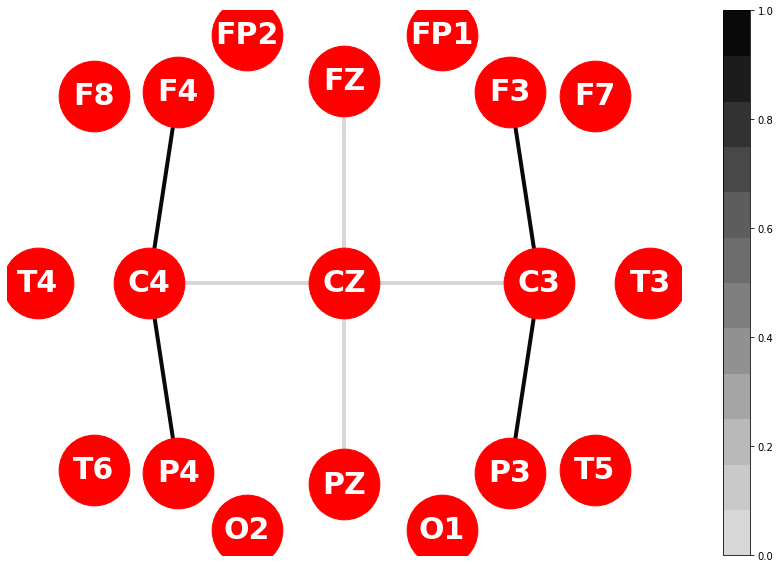

In [19]:
def get_adj_matrix(row_present_channels):
    row_adj_mx_present = np.zeros_like(adj_mx)
    for bi_ch in row_present_channels:
        ch1, ch2 = channels[bi_ch]
        idx1 = node_id_dict[ch1.upper()]
        idx2 = node_id_dict[ch2.upper()]
        dist = adj_mx[idx1, idx2]
        row_adj_mx_present[idx1, idx2] = dist
        row_adj_mx_present[idx2, idx1] = dist
    return row_adj_mx_present

draw_graph_weighted_edge(get_adj_matrix(ch_min_cost), node_id_dict, pos_spec, is_directed=False, plot_colorbar=True, font_size=30)

## get the number of electrodes for energy consumption

In [20]:
def get_num_electrodes(row_present_channels):
    all_electrodes = []
    for bi_ch in row_present_channels:
        ch1, ch2 = channels[bi_ch]
        if ch1 not in all_electrodes:
            all_electrodes.append(ch1)
        if ch2 not in all_electrodes:
            all_electrodes.append(ch2)
    return len(all_electrodes)

get_num_electrodes([0,1,2,3,4,5,6])

8

In [21]:
df['num_electrodes'] = df['present_channels'].apply(get_num_electrodes)
df['num_electrodes'].value_counts()

11    3515
10    1946
12    1640
9      271
13     169
8        2
Name: num_electrodes, dtype: int64

## Get the performance results

In [22]:
import json
import os

# Directory containing the JSON files
json_dir = "../../output/global8"

# Initialize an empty list to store the JSON data
json_data = []

# Loop through all JSON files in the directory
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename)) as json_file:
            data = json.load(json_file)
            json_data.append(data)

# Create a DataFrame from the list of JSON data
performance_df = pd.DataFrame(json_data)
performance_df.head()

,selected_channel_id,selected_channels,best_threshold,accuracy,f1_score,auc,val_auc,validation_time,test_time,confusion_matrix
0,2097,"[2, 4, 5, 10, 14, 17, 18, 19]",0.879175,0.949954,0.597128,0.931635,0.926551,14.881629,4.175193,"[[34803, 1042], [866, 1414]]"
1,1681,"[2, 8, 12, 13, 14, 15, 18, 19]",0.796608,0.927134,0.541735,0.928148,0.904839,14.640207,4.175659,"[[33705, 2140], [638, 1642]]"
2,388,"[5, 6, 8, 9, 12, 16, 17, 18]",0.869042,0.947777,0.536222,0.891580,0.910022,23.627120,10.422556,"[[34983, 862], [1129, 1151]]"
3,524,"[4, 8, 9, 12, 13, 16, 17, 19]",0.811015,0.930151,0.497831,0.904448,0.895221,23.630146,10.632648,"[[34142, 1703], [960, 1320]]"
4,4871,"[0, 6, 7, 8, 9, 10, 18, 19]",0.897425,0.958662,0.606394,0.925532,0.933913,14.671534,4.159525,"[[35335, 510], [1066, 1214]]"


In [23]:
performance_df = performance_df.set_index('selected_channel_id')
performance_df.sort_index()

,selected_channels,best_threshold,accuracy,f1_score,auc,val_auc,validation_time,test_time,confusion_matrix
selected_channel_id,,,,,,,,,
0,"[12, 13, 14, 15, 16, 17, 18, 19]",0.796355,0.937574,0.573324,0.924862,0.891435,15.221309,4.335090,"[[34146, 1699], [681, 1599]]"
1,"[11, 13, 14, 15, 16, 17, 18, 19]",0.835778,0.948643,0.608713,0.925262,0.889107,15.556816,4.416949,"[[34644, 1201], [757, 1523]]"
2,"[11, 12, 13, 14, 15, 17, 18, 19]",0.815362,0.941875,0.585174,0.923785,0.903143,15.629671,4.443074,"[[34346, 1499], [717, 1563]]"
3,"[11, 12, 13, 14, 15, 16, 18, 19]",0.782626,0.932905,0.559725,0.923960,0.902987,15.119106,4.289356,"[[33941, 1904], [654, 1626]]"
4,"[11, 12, 13, 14, 15, 16, 17, 19]",0.766265,0.928577,0.549247,0.918523,0.902376,15.011047,4.282920,"[[33743, 2102], [621, 1659]]"
...,...,...,...,...,...,...,...,...,...
7538,"[0, 1, 2, 3, 4, 5, 8, 14]",0.861937,0.936892,0.509180,0.905906,0.894627,14.459374,4.127105,"[[34471, 1374], [1032, 1248]]"
7539,"[0, 1, 2, 3, 4, 5, 8, 12]",0.876661,0.939095,0.472991,0.867909,0.880071,14.568127,4.126064,"[[34761, 1084], [1238, 1042]]"
7540,"[0, 1, 2, 3, 4, 5, 8, 11]",0.855208,0.938754,0.550356,0.910782,0.914450,14.488836,4.122948,"[[34361, 1484], [851, 1429]]"


In [24]:
df_merged = pd.merge(left=df, right=performance_df, left_index=True, right_index=True)
df_merged.head()

,0,1,2,3,4,5,6,7,present_channels,distance_metric,...,num_electrodes,selected_channels,best_threshold,accuracy,f1_score,auc,val_auc,validation_time,test_time,confusion_matrix
0,12,13,14,15,16,17,18,19,"[12, 13, 14, 15, 16, 17, 18, 19]","([0.7730530798435211], [0.35925738761822384], 1)",...,9,"[12, 13, 14, 15, 16, 17, 18, 19]",0.796355,0.937574,0.573324,0.924862,0.891435,15.221309,4.335090,"[[34146, 1699], [681, 1599]]"
1,11,13,14,15,16,17,18,19,"[11, 13, 14, 15, 16, 17, 18, 19]","([0.8564841151237488], [0.39164496461550397], 1)",...,9,"[11, 13, 14, 15, 16, 17, 18, 19]",0.835778,0.948643,0.608713,0.925262,0.889107,15.556816,4.416949,"[[34644, 1201], [757, 1523]]"
2,11,12,13,14,15,17,18,19,"[11, 12, 13, 14, 15, 17, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)",...,9,"[11, 12, 13, 14, 15, 17, 18, 19]",0.815362,0.941875,0.585174,0.923785,0.903143,15.629671,4.443074,"[[34346, 1499], [717, 1563]]"
3,11,12,13,14,15,16,18,19,"[11, 12, 13, 14, 15, 16, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)",...,9,"[11, 12, 13, 14, 15, 16, 18, 19]",0.782626,0.932905,0.559725,0.923960,0.902987,15.119106,4.289356,"[[33941, 1904], [654, 1626]]"
4,11,12,13,14,15,16,17,19,"[11, 12, 13, 14, 15, 16, 17, 19]","([1.0154288113117218], [0.4378661583695147], 1)",...,9,"[11, 12, 13, 14, 15, 16, 17, 19]",0.766265,0.928577,0.549247,0.918523,0.902376,15.011047,4.282920,"[[33743, 2102], [621, 1659]]"


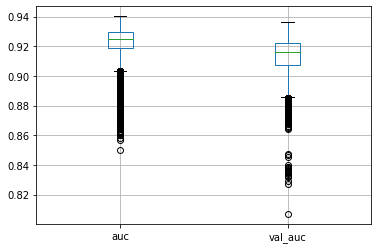

In [25]:
df_merged[['auc', 'val_auc']].boxplot()

## Define the design cost

In [26]:
lambda_ = 100  # performance
beta_ = 1 # material usage
theta_ = 1  # energy consumption
df_merged['design_cost'] = lambda_ * (1-df_merged['auc']) + beta_ * (df_merged['diameter'] + (df_merged['n_components'] - 1)) + theta_ * (df_merged['num_electrodes'] / 19)
df_merged.head()

,0,1,2,3,4,5,6,7,present_channels,distance_metric,...,selected_channels,best_threshold,accuracy,f1_score,auc,val_auc,validation_time,test_time,confusion_matrix,design_cost
0,12,13,14,15,16,17,18,19,"[12, 13, 14, 15, 16, 17, 18, 19]","([0.7730530798435211], [0.35925738761822384], 1)",...,"[12, 13, 14, 15, 16, 17, 18, 19]",0.796355,0.937574,0.573324,0.924862,0.891435,15.221309,4.335090,"[[34146, 1699], [681, 1599]]",8.760496
1,11,13,14,15,16,17,18,19,"[11, 13, 14, 15, 16, 17, 18, 19]","([0.8564841151237488], [0.39164496461550397], 1)",...,"[11, 13, 14, 15, 16, 17, 18, 19]",0.835778,0.948643,0.608713,0.925262,0.889107,15.556816,4.416949,"[[34644, 1201], [757, 1523]]",8.804009
2,11,12,13,14,15,17,18,19,"[11, 12, 13, 14, 15, 17, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)",...,"[11, 12, 13, 14, 15, 17, 18, 19]",0.815362,0.941875,0.585174,0.923785,0.903143,15.629671,4.443074,"[[34346, 1499], [717, 1563]]",9.110606
3,11,12,13,14,15,16,18,19,"[11, 12, 13, 14, 15, 16, 18, 19]","([1.0154288113117218], [0.4378661583695147], 1)",...,"[11, 12, 13, 14, 15, 16, 18, 19]",0.782626,0.932905,0.559725,0.923960,0.902987,15.119106,4.289356,"[[33941, 1904], [654, 1626]]",9.093094
4,11,12,13,14,15,16,17,19,"[11, 12, 13, 14, 15, 16, 17, 19]","([1.0154288113117218], [0.4378661583695147], 1)",...,"[11, 12, 13, 14, 15, 16, 17, 19]",0.766265,0.928577,0.549247,0.918523,0.902376,15.011047,4.282920,"[[33743, 2102], [621, 1659]]",9.636824


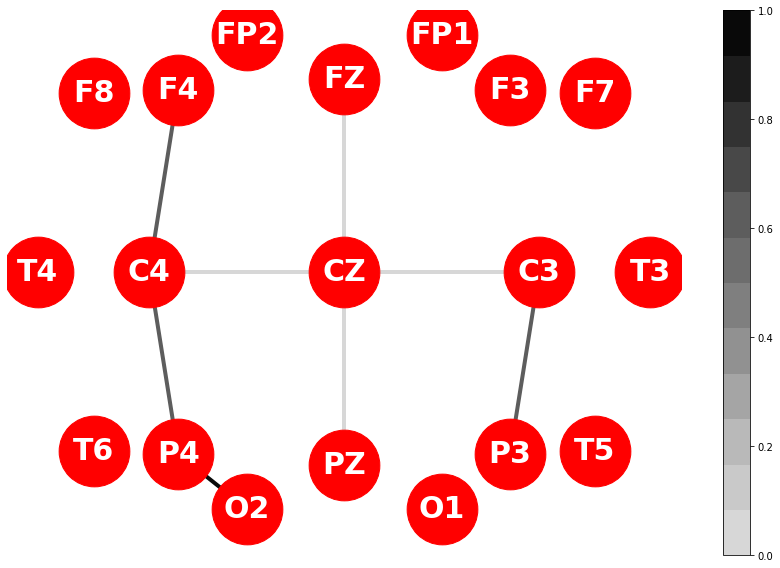

In [27]:
ch_min_cost = df_merged.loc[df_merged['design_cost'].idxmin()]['present_channels']
draw_graph_weighted_edge(get_adj_matrix(ch_min_cost), node_id_dict, pos_spec, is_directed=False, plot_colorbar=True, font_size=30, save_dir='./best.png')


## Contour

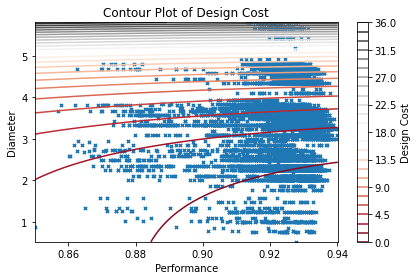

In [49]:
def cost(perf, dia):
    lambda_ = 100  # performance
    beta_ = 0.1  # material usage
    return lambda_ * (1-perf)**2 + beta_ * np.exp(dia)


# Extract the data
performance_values = df_merged['auc']
diameter_values = df_merged['diameter'] + (df_merged['n_components'] - 1)

# Create a meshgrid for performance and diameter
performance_range = np.linspace(min(performance_values), max(performance_values), 100)
diameter_range = np.linspace(min(diameter_values), max(diameter_values), 100)
performance_mesh, diameter_mesh = np.meshgrid(performance_range, diameter_range)

# Interpolate design cost values for the meshgrid
design_cost_mesh = cost(performance_mesh, diameter_mesh)

# Create the contour plot
plt.contour(performance_mesh, diameter_mesh, design_cost_mesh, levels=30, cmap='RdGy')
plt.colorbar(label='Design Cost')
plt.scatter(x=performance_values,y=diameter_values, marker='x', s=10)

plt.xlabel('Performance')
plt.ylabel('Diameter')
plt.title('Contour Plot of Design Cost')
plt.tight_layout()
plt.savefig('./contour_non_linear.png', dpi=300)

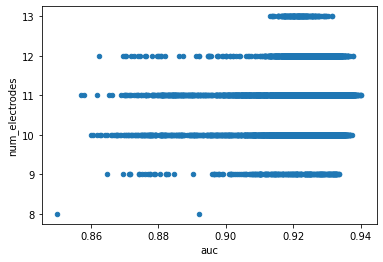

In [29]:
df_merged.plot.scatter(x='auc', y='num_electrodes')